In [1]:
import os
import pandas as pd

In [2]:
"""1. Cargar los datos"""

# Especificar la ruta de la carpeta que contiene los archivos CSV
folder_path = r"C:/Users/usuario/Desktop/dataset"

# Crear una lista para almacenar cada DataFrame
dfs = []

# Iterar sobre los archivos en la carpeta
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):  # Verificar si el archivo es un CSV
        file_path = os.path.join(folder_path, file_name)
        print(f"Cargando {file_name}...")
        # Cargar el archivo CSV en un DataFrame
        df = pd.read_csv(file_path)
        # Añadir el DataFrame a la lista
        dfs.append(df)

# Combinar todos los DataFrames en uno solo
combined_df = pd.concat(dfs, ignore_index=True)

# Mostrar las primeras filas del DataFrame combinado
print(combined_df.head())


Cargando 2017PurchasePricesDec.csv...
Cargando BegInvFINAL12312016.csv...
Cargando EndInvFINAL12312016.csv...
Cargando InvoicePurchases12312016.csv...
Cargando PurchasesFINAL12312016.csv...
Cargando SalesFINAL12312016.csv...
   Brand                  Description  Price   Size Volume  Classification  \
0   58.0  Gekkeikan Black & Gold Sake  12.99  750mL    750             1.0   
1   62.0     Herradura Silver Tequila  36.99  750mL    750             1.0   
2   63.0   Herradura Reposado Tequila  38.99  750mL    750             1.0   
3   72.0         No. 3 London Dry Gin  34.99  750mL    750             1.0   
4   75.0    Three Olives Tomato Vodka  14.99  750mL    750             1.0   

   PurchasePrice  VendorNumber                   VendorName InventoryId  ...  \
0           9.28        8320.0  SHAW ROSS INT L IMP LTD             NaN  ...   
1          28.67        1128.0  BROWN-FORMAN CORP                   NaN  ...   
2          30.46        1128.0  BROWN-FORMAN CORP                 

In [3]:
"""2. Entender los datos
Revisa la estructura y las estadísticas del dataset:"""

# Información general sobre las columnas, tipos de datos y valores nulos
print(df.info())

# Resumen estadístico de las variables numéricas
print(df.describe())

# Verificar si hay valores nulos
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  object 
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 112.0+ MB
None
              Store         Brand  SalesQuantity  SalesDollars    

"""3. Análisis de tendencias y patrones
Para visualizar tendencias a lo largo del tiempo, necesitas asegurarte de que haya una columna de fechas en tu dataset. Si es así, puedes agrupar los datos por períodos de tiempo para analizar la demanda."""

In [4]:
# Verificar si hay valores nulos o formatos incorrectos en la columna 'SalesDate'
print(df['SalesDate'].isnull().sum())
print(df['SalesDate'].unique()[:10])  # Muestra los primeros 10 valores únicos de SalesDate


0
['1/1/2016' '1/2/2016' '1/3/2016' '1/8/2016' '1/9/2016' '1/15/2016'
 '1/22/2016' '1/30/2016' '1/5/2016' '1/6/2016']


In [5]:
print(df.shape)


(1048575, 14)


In [6]:
df['SalesDate'] = pd.to_datetime(df['SalesDate'], errors='coerce')

# Verificar cuántos valores NaT hay después de la conversión
print(df['SalesDate'].isnull().sum())


0


In [7]:
df = df.dropna(subset=['SalesDate'])


In [9]:
# Convertir SalesDate a tipo datetime si aún no lo has hecho
df['SalesDate'] = pd.to_datetime(df['SalesDate'], errors='coerce')

# Agrupar por mes (M) y sumar solo las columnas numéricas
df_grouped = df.groupby(df['SalesDate'].dt.to_period('M')).sum(numeric_only=True)

# Mostrar los primeros 5 resultados del dataframe agrupado
print(df_grouped.head())


              Store        Brand  SalesQuantity  SalesDollars   SalesPrice  \
SalesDate                                                                    
2016-01    40740291  11522299834        2194959   29854027.92  14523308.66   
2016-02     1287258   1238423052         256210    3285347.37   1657903.86   

              Volume  Classification   ExciseTax    VendorNo  
SalesDate                                                     
2016-01    887865046         1333979  1233308.90  6549778591  
2016-02    108310592          151380   157989.75   785048839  


In [10]:
print(df.dtypes)


InventoryId               object
Store                      int64
Brand                      int64
Description               object
Size                      object
SalesQuantity              int64
SalesDollars             float64
SalesPrice               float64
SalesDate         datetime64[ns]
Volume                     int64
Classification             int64
ExciseTax                float64
VendorNo                   int64
VendorName                object
dtype: object


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Verificar los tipos de datos
print(df_grouped.dtypes)

# Verificar valores únicos en la columna SalesQuantity
print(df_grouped['SalesQuantity'].unique())


Store               int64
Brand               int64
SalesQuantity       int64
SalesDollars      float64
SalesPrice        float64
Volume              int64
Classification      int64
ExciseTax         float64
VendorNo            int64
dtype: object
[2194959  256210]


In [16]:
# Asegúrate de que SalesQuantity sea de tipo numérico
df_grouped['SalesQuantity'] = pd.to_numeric(df_grouped['SalesQuantity'], errors='coerce')


In [18]:
# Verificar los tipos de datos
print(df_grouped.dtypes)

# Mostrar las primeras filas del DataFrame
print(df_grouped.head())

# Verificar valores únicos en la columna SalesQuantity
print(df_grouped['SalesQuantity'].unique())

# Verificar si hay NaN en SalesQuantity
print(df_grouped['SalesQuantity'].isnull().sum())


Store               int64
Brand               int64
SalesQuantity       int64
SalesDollars      float64
SalesPrice        float64
Volume              int64
Classification      int64
ExciseTax         float64
VendorNo            int64
dtype: object
              Store        Brand  SalesQuantity  SalesDollars   SalesPrice  \
SalesDate                                                                    
2016-01    40740291  11522299834        2194959   29854027.92  14523308.66   
2016-02     1287258   1238423052         256210    3285347.37   1657903.86   

              Volume  Classification   ExciseTax    VendorNo  
SalesDate                                                     
2016-01    887865046         1333979  1233308.90  6549778591  
2016-02    108310592          151380   157989.75   785048839  
[2194959  256210]
0


In [20]:
# Asegurarse de que el índice 'SalesDate' sea de tipo datetime
df_grouped.index = pd.to_datetime(df_grouped.index)

# Restablecer el índice para que 'SalesDate' sea una columna normal
df_reset = df_grouped.reset_index()

# Visualizar la demanda a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_reset, x='SalesDate', y='SalesQuantity')  # Ahora 'SalesDate' es una columna normal
plt.title('Demanda a lo largo del tiempo')
plt.xticks(rotation=45)
plt.xlabel('Fecha de Ventas')
plt.ylabel('Cantidad Vendida')
plt.show()


TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead

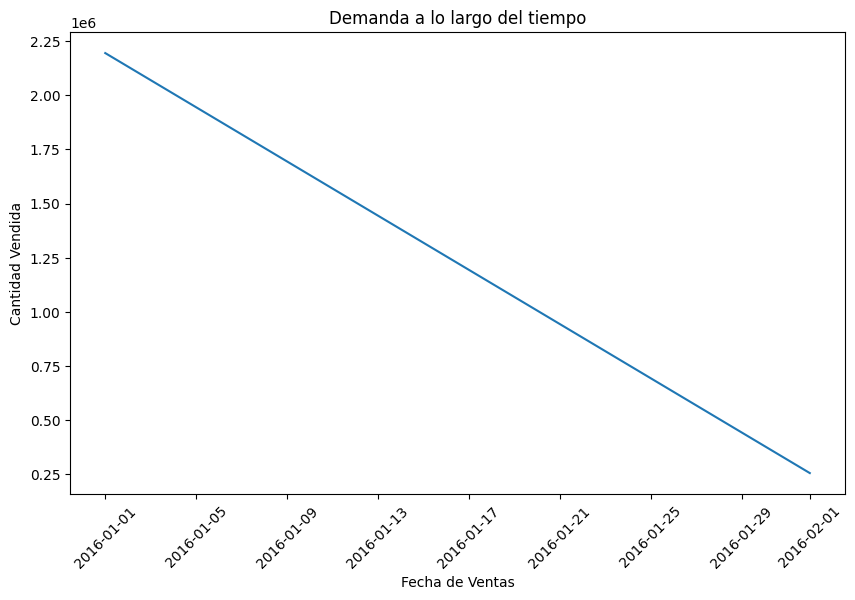

In [21]:
# Asegurarse de que el índice 'SalesDate' sea de tipo timestamp
df_grouped.index = df_grouped.index.to_timestamp()

# Restablecer el índice para que 'SalesDate' sea una columna normal
df_reset = df_grouped.reset_index()

# Visualizar la demanda a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_reset, x='SalesDate', y='SalesQuantity')  # Ahora 'SalesDate' es una columna normal
plt.title('Demanda a lo largo del tiempo')
plt.xticks(rotation=45)
plt.xlabel('Fecha de Ventas')
plt.ylabel('Cantidad Vendida')
plt.show()
